<span style="font-size:60px;">Clustering ISG</span>

<span style="font-size:40px;">Importation des librairies</span>


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Traces pré traitées

In [42]:
data = pd.read_csv("clean_spy_data.csv")
data.head()

,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time
0,288908,f10c3152,2023-03-17T13:49:01.7960000Z,2023-03-17T13:49:15.073Z,executed,levels/collaborateur/niveau03,NaN,NaN
1,288914,f10c3152,2023-03-17T13:48:57.6240000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
2,288930,f10c3152,2023-03-17T13:48:48.9860000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
3,288945,f10c3152,2023-03-17T13:48:41.1910000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
4,289002,f10c3152,2023-03-17T13:48:10.5390000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN


Données sur les profils des joueurs

In [22]:
profiles = pd.read_csv("profiles.csv")
profiles.head()

,ID,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
1,133323C,5ème,5ÈME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-30 09:50:07
2,1410D322,4ème,4EME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-10-06 15:19:12
3,149C46A2,4ème,4EME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-15 09:55:08
4,14A766E2,CM2,CM2,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 13:57:30


<span style="font-size:40px;">Présentation des données</span>


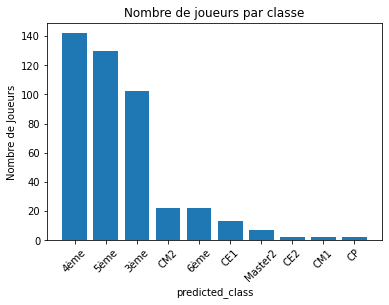

In [14]:
plt.figure()
class_count = profiles['predicted_class'].value_counts()

plt.bar(class_count.index, class_count.values)
plt.title('Nombre de joueurs par classe')
plt.xlabel('predicted_class')
plt.ylabel('Nombre de Joueurs')
plt.xticks(rotation=45)  
plt.show()

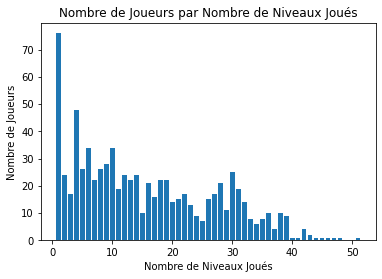

In [19]:
levels_played_counts = data.groupby('actor')['levels'].nunique()

players_per_level_count = levels_played_counts.value_counts().sort_index()

plt.bar(players_per_level_count.index, players_per_level_count.values)
plt.title('Nombre de Joueurs par Nombre de Niveaux Joués')
plt.xlabel('Nombre de Niveaux Joués')
plt.ylabel('Nombre de Joueurs')
plt.show()

<span style="font-size:40px;">Clustering 2D</span>


c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


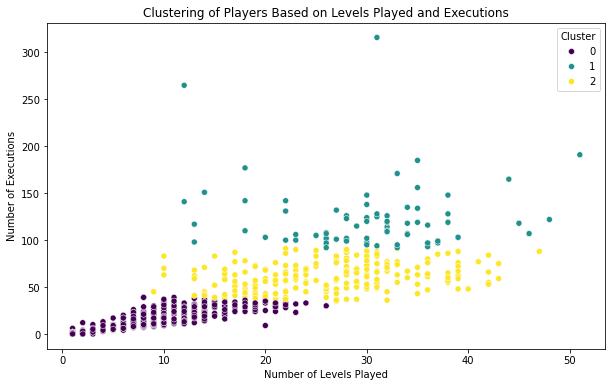

In [8]:
# Filter data for 'executed' actions and count per actor
executed_counts = data[data['verb'] == 'executed'].groupby('actor').size()

# Count unique levels played per actor
levels_played_counts = data.groupby('actor')['levels'].nunique()

# Merge these two series into a DataFrame
analysis_df = pd.DataFrame({
    'LevelsPlayed': levels_played_counts,
    'Executions': executed_counts
}).fillna(0)

# Apply clustering
kmeans = KMeans(n_clusters=3)
analysis_df['Cluster'] = kmeans.fit_predict(analysis_df[['LevelsPlayed', 'Executions']])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=analysis_df, x='LevelsPlayed', y='Executions', hue='Cluster', palette='viridis')
plt.title('Clustering of Players Based on Levels Played and Executions')
plt.xlabel('Number of Levels Played')
plt.ylabel('Number of Executions')
plt.legend(title='Cluster')
plt.show()

In [7]:
merged_data = pd.merge(data, profiles, left_on='actor', right_on='ID', how='right')

In [8]:
merged_data.head()

,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time,ID,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,195538.0,103D4EAB,2023-05-25T07:59:04.6720000Z,2023-05-25T07:55:43.862Z,closed,levels/collaborateur/niveau02,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
1,195539.0,103D4EAB,2023-05-25T07:59:03.9780000Z,2023-05-25T07:55:43.862Z,interacted,levels/collaborateur/niveau02,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
2,195546.0,103D4EAB,2023-05-25T07:58:59.0920000Z,2023-05-25T07:55:43.862Z,opened,levels/collaborateur/niveau02,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
3,195547.0,103D4EAB,2023-05-25T07:58:58.9760000Z,2023-05-25T07:55:43.862Z,launched,levels/collaborateur/niveau02,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
4,195548.0,103D4EAB,2023-05-25T07:58:58.7120000Z,2023-05-25T07:55:43.862Z,exited,levels/collaborateur/niveau02,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32


c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


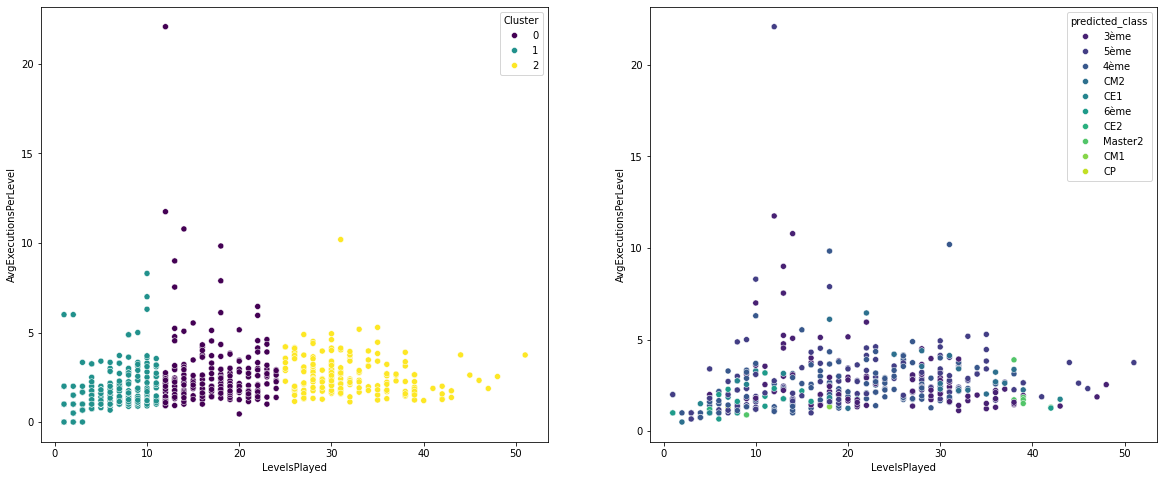

In [112]:
total_executions_per_actor = data[data['verb'] == 'executed'].groupby('actor').size()

# Calculate the average number of executions per level for each actor
average_executions_per_level = total_executions_per_actor / levels_played_counts

# Updating the DataFrame for clustering
analysis_df['AvgExecutionsPerLevel'] = average_executions_per_level.fillna(0)

# Apply clustering with the new metric
kmeans = KMeans(n_clusters=3)
analysis_df['Cluster'] = kmeans.fit_predict(analysis_df[['LevelsPlayed', 'AvgExecutionsPerLevel']])
analysis_df_class = pd.merge(analysis_df, profiles, left_on='actor', right_on='ID', how='right')
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(data=analysis_df, x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='Cluster', palette='viridis', ax = ax1)
sns.scatterplot(data=analysis_df_class, x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='predicted_class', palette='viridis',ax = ax2)

plt.show()

In [25]:
# Calculating the mean completion time for each level

mean_completion_time_per_level = data.groupby('levels')['time'].mean()
mean_completion_time_per_level

levels
levels/blocklymaze/niveau01      26.851355
levels/blocklymaze/niveau02      27.300717
levels/blocklymaze/niveau03      39.478320
levels/blocklymaze/niveau04      67.028032
levels/blocklymaze/niveau05      48.056258
                                   ...    
levels/tutoriel/createscript     54.539170
levels/tutoriel/nommerscript     66.529355
levels/tutoriel/ouvrirporte      54.059812
levels/tutoriel/tutoriel        104.561823
testfromleveled                 428.642000
Name: time, Length: 69, dtype: float64

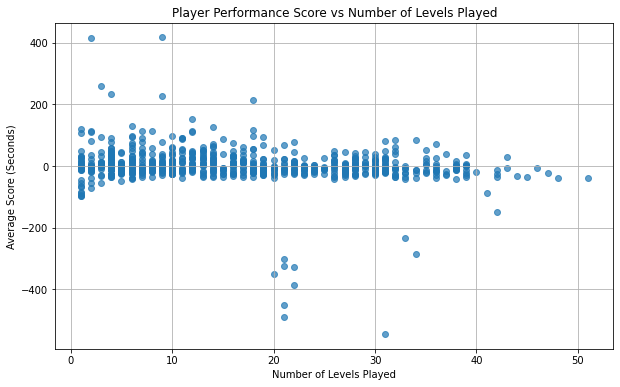

In [119]:
# Step 1: Calculating the difference between completion time and mean completion time for each level for each player

# Joining the mean completion time data with the original data

data_with_mean_time = data.merge(mean_completion_time_per_level, on='levels', suffixes=('', '_mean'))



# Calculating the absolute difference between the player's completion time and the mean completion time

data_with_mean_time['time'] = (data_with_mean_time['time'] - data_with_mean_time['time_mean'])



# Step 2: Calculating the mean score (average of the time differences) for each player

player_scores = data_with_mean_time.groupby('actor')['time'].mean(numeric_only=False)



# Step 3: Preparing data for the plot

# Counting the number of levels played by each player

levels_played_per_player = data.groupby('actor')['levels'].nunique()



# Merging the count of levels played with the scores for each player

plot_data = pd.DataFrame({

    'levels_played': levels_played_per_player,

    'average_score': player_scores

})


plot_data = plot_data[plot_data['average_score'] <1000]
# Step 4: Creating the plot

plt.figure(figsize=(10,6))

plt.scatter(plot_data['levels_played'], plot_data['average_score'], alpha=0.7)

plt.title('Player Performance Score vs Number of Levels Played')

plt.xlabel('Number of Levels Played')

plt.ylabel('Average Score (Seconds)')

plt.grid(True)

plt.show()

c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_14260\3665365532.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data2['Cluster'] = km

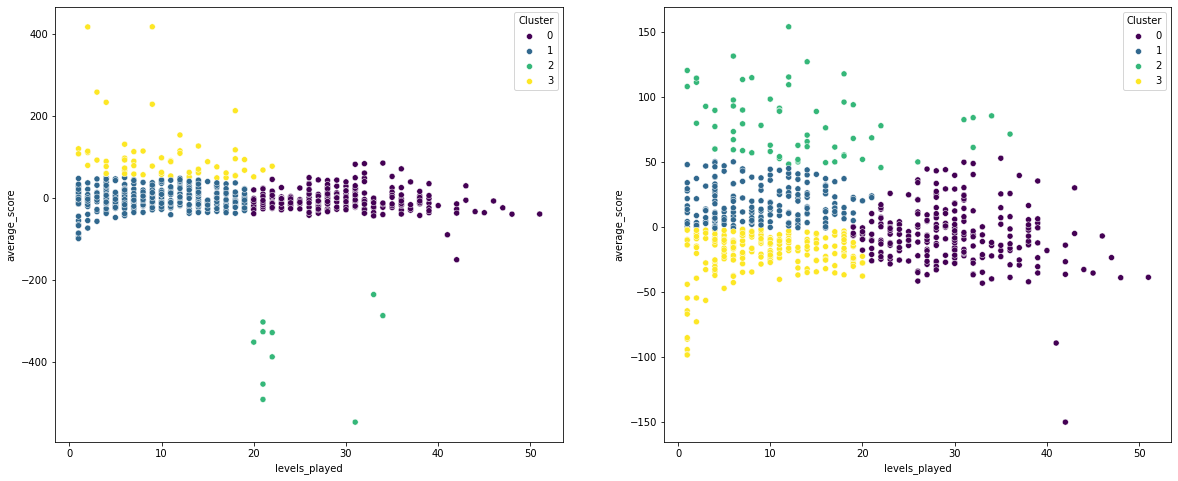

In [123]:
plot_data1 = plot_data[plot_data['average_score'] <1000]
plot_data2 = plot_data[(plot_data['average_score'] <200) & (plot_data['average_score'] >-200)]
# Normalisation des caractéristiques
scaler1 = StandardScaler()
scaled_features1 = scaler1.fit_transform(plot_data1)

scaler2 = StandardScaler()
scaled_features2 = scaler2.fit_transform(plot_data2)

# Application du clustering
kmeans1 = KMeans(n_clusters=4)  
plot_data1['Cluster'] = kmeans1.fit_predict(scaled_features1)

kmeans2 = KMeans(n_clusters=4)  
plot_data2['Cluster'] = kmeans2.fit_predict(scaled_features2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(data=plot_data1, x='levels_played', y='average_score', hue='Cluster', palette='viridis', ax = ax1)
sns.scatterplot(data=plot_data2, x='levels_played', y='average_score', hue='Cluster', palette='viridis',ax = ax2)

plt.show()

In [59]:
plot_data[plot_data["Cluster"]==2]

,levels_played,average_score,Cluster
actor,,,
26A075EC,22,-386.883500,2
28F8DD92,22,-327.661715,2
2918666D,20,-351.009547,2
395F798E,21,-325.629436,2
3E348287,21,-490.698707,2
43BCE782,21,-453.292426,2
5FC1868E,31,-545.994409,2
865168F4,21,-301.926301,2
C9A00DB4,33,-234.986073,2


Voir pourquoi un CM2 obtient d'aussi bons scores

<span style="font-size:40px;">Clustering 3D</span>


c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


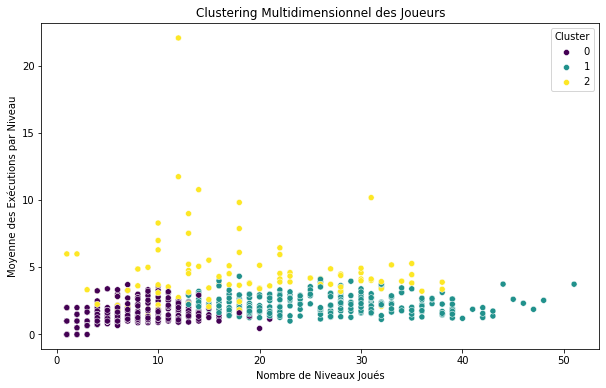

In [48]:
levels_played_counts = data.groupby('actor')['levels'].nunique()

# Calcul de la moyenne des exécutions par niveau
total_executions_per_actor = data[data['verb'] == 'executed'].groupby('actor').size()
avg_executions_per_level = total_executions_per_actor / levels_played_counts

# Calcul du temps moyen par acteur
total_time_per_actor = data.groupby('actor')['time'].sum()
avg_time_per_actor = total_time_per_actor / levels_played_counts

# Création du DataFrame pour le clustering
clustering_df = pd.DataFrame({
    'LevelsPlayed': levels_played_counts,
    'AvgExecutionsPerLevel': avg_executions_per_level,
    'AvgTimePerActor': avg_time_per_actor
}).fillna(0)

# On enlève les quelques données aberrantes
clustering_df = clustering_df[clustering_df["AvgTimePerActor"]<1000]
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)

# Application du clustering
kmeans = KMeans(n_clusters=3)  
clustering_df['Cluster'] = kmeans.fit_predict(scaled_features)
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='Cluster', data=clustering_df, palette='viridis')
plt.title('Clustering Multidimensionnel des Joueurs')
plt.xlabel('Nombre de Niveaux Joués')
plt.ylabel('Moyenne des Exécutions par Niveau')
plt.legend(title='Cluster')
plt.show()

In [79]:
merge2 = pd.merge(clustering_df,profiles, left_on = "actor",right_on = "ID")
merge2.head()

,LevelsPlayed,AvgExecutionsPerLevel,AvgTimePerActor,Cluster,ID,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,13,1.769231,62.821615,0,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
1,34,3.147059,138.677706,1,133323C,5ème,5ÈME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-30 09:50:07
2,12,1.083333,44.139750,0,1410D322,4ème,4EME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-10-06 15:19:12
3,19,1.263158,67.938842,1,149C46A2,4ème,4EME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-15 09:55:08
4,31,1.838710,198.058935,1,14A766E2,CM2,CM2,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 13:57:30


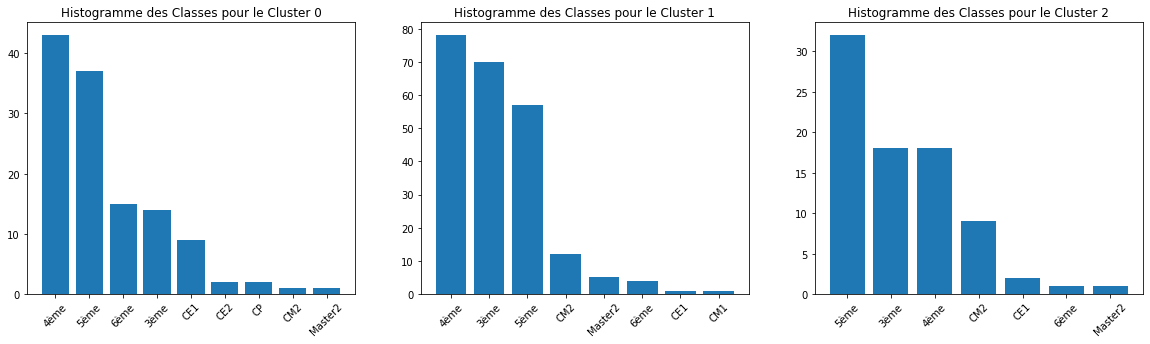

In [107]:
# Nombre de clusters uniques
num_clusters = merge2['Cluster'].nunique()
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Créer un histogramme pour chaque cluster
for i in range(num_clusters):
    
    # Filtrer les données pour le cluster actuel
    cluster_data = merge2[merge2['Cluster'] == i]
    # Compter les occurrences de chaque classe dans le cluster
    class_counts = cluster_data['predicted_class'].value_counts()
    # Créer un histogramme
    axes[i].bar(class_counts.index, class_counts.values)
    axes[i].set_title(f'Histogramme des Classes pour le Cluster {i}')
    axes[i].tick_params(axis='x', rotation=45)


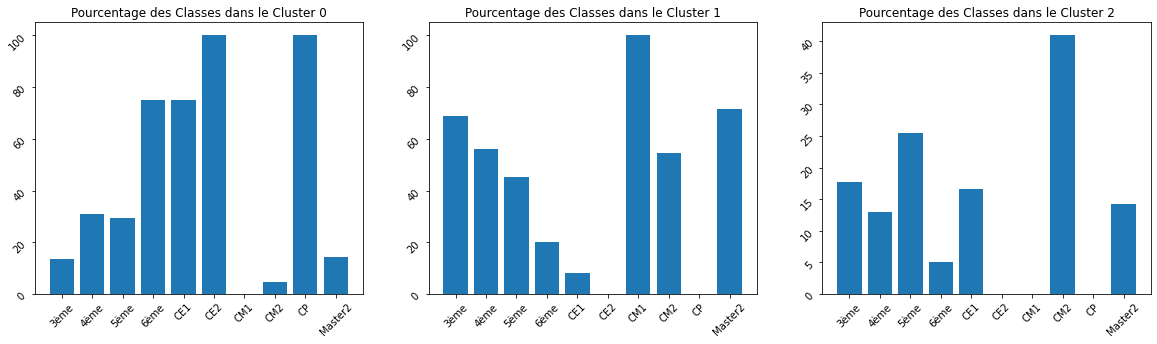

In [106]:
total_per_class = merge2['predicted_class'].value_counts()

# Nombre de clusters uniques
num_clusters = merge2['Cluster'].nunique()
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Créer un graphique pour chaque cluster
for i in range(num_clusters):
    
    # Filtrer les données pour le cluster actuel
    cluster_data = merge2[merge2['Cluster'] == i]
    # Compter les occurrences de chaque classe dans le cluster
    class_counts = cluster_data['predicted_class'].value_counts()
    # Calculer le pourcentage par rapport au total pour chaque classe
    class_percentages = (class_counts / total_per_class) * 100
    # Créer un histogramme
    axes[i].bar(class_percentages.index, class_percentages.values)
    axes[i].set_title(f'Pourcentage des Classes dans le Cluster {i}')
    axes[i].tick_params(rotation=45)  
    